In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')
import numpy as np

In [2]:
#Reading in the data
cr = pd.read_csv('crime.csv')


In [3]:
#Sorting for only nyc information
df = cr[cr.Region == 'New York City']
nyc_tot = df[df.County == 'Region Total']
#Dropping unwanted columns
nyc_tot = nyc_tot.drop(nyc_tot[['Agency', 'Months Reported', 'County']], axis=1)
# Renaming columns
nyc_tot=nyc_tot.rename(columns={'Violent Total': 'Violent_Total',
                       'Index Total':'Total',
                               'Property Total':'Property_Total',
                               'Aggravated Assault':'Aggravated_Assault'})
# Changingthe inddex to year
nyc_tot.set_index('Year', inplace=True)

In [4]:
nyc_tot.to_csv('crime02.csv')

# EDA
Lets look at the columns in question regarding broken glass.
On the surface level we'll see if the trends in crime did decrease

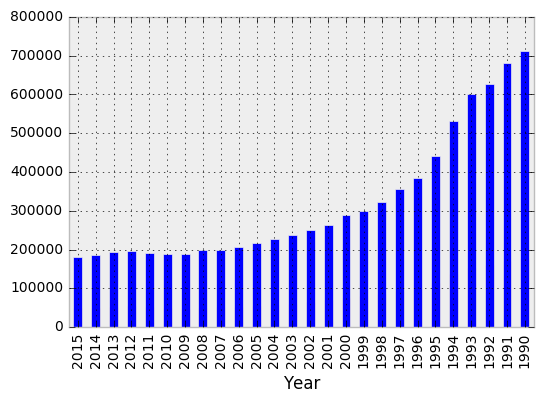

In [5]:
nyc_tot.Violent_Total.plot(kind='bar', color= 'red')
nyc_tot.Total.plot(kind='bar', color= 'blue')

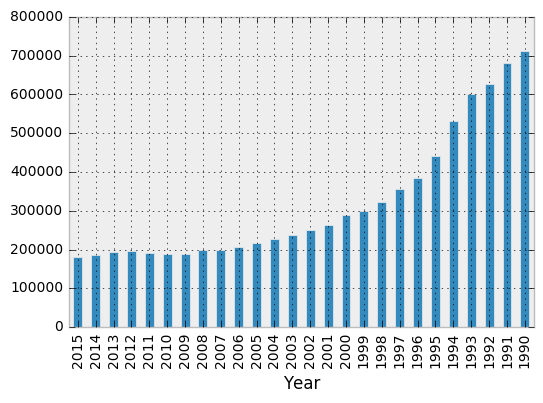

In [6]:
nyc_tot.Total.plot(kind='bar')

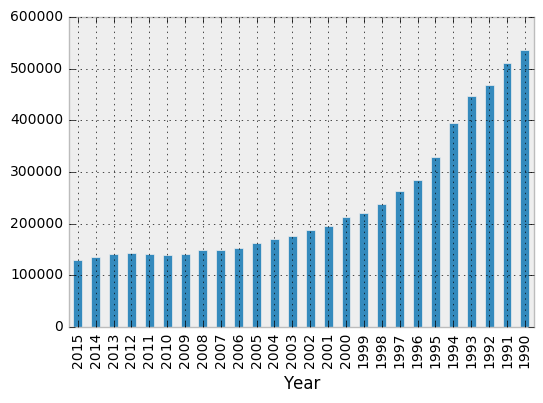

In [7]:
nyc_tot.Property_Total.plot(kind='bar')

In [8]:
import seaborn as sns
sns.lmplot()

TypeError: lmplot() takes at least 3 arguments (0 given)

So it looks like crime has fallen in all three categories every year.
Lets see the relations together

Lets see how well minor  crimes can predict the number of crimes


In [9]:
X = nyc_tot.drop(['Total', 'Violent_Total', 'Region', 'Murder', 'Rape', 'Aggravated_Assault'], axis=1)
y = nyc_tot['Violent_Total']

In [10]:
#
#X = nyc_tot.loc['2014':'1990',:]
#y = nyc_tot.iloc[0]

In [14]:
#np.reshape(y,(11,1))

In [15]:
nyc_tot.head(1)

,Total,Violent_Total,Murder,Rape,Robbery,Aggravated_Assault,Property_Total,Burglary,Larceny,Motor Vehicle Theft,Region
Year,,,,,,,,,,,
2015,179948.0,50088.0,352.0,2244.0,16946.0,30546.0,129860.0,14098.0,108376.0,7386.0,New York City


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict, train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [18]:
lin = LinearRegression(normalize=True)
lin.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [19]:
lin.score(X_test, y_test)

0.9932176672495121

In [ ]:
lin.get_params